# Visualization of brain images
This is a shortened version of the `2_1_visualization_of_brain_images` notebook.


## Outline
Plotting tools from Nilearn for an **easy visualization** of **neuroimaging data** and **statistical analysis results**.

In this brief tutorial we will show how to visualize

- **anatomical images** (`plotting.plot_anat`)

- **stat maps** on an **anatomical image** (`plotting.plot_stat_map`)

- **stat maps** on a **glass brain** (`plotting.plot_glass_brain`)





## Few conventions

* Nilearn plotting tools by default uses standard anatomical **Montreal Neurological Image (MNI)** template brain image as a background, **same template as used in SPM & FSL software**.

## Getting started
For the plots to be rendered directly into the notebook we need the `%matplotlib inline` magic.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Plotting Anatomical images `plot_anat`

We show here how to plot anatomical image using tool: `plotting.plot_anat`

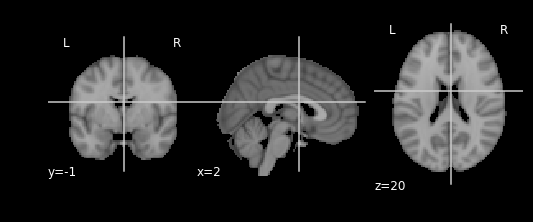

In [2]:
# First, we fetch and load the default anatomical image available in Nilearn datasets module
from nilearn import datasets

# default MNI152 template
anatomical_image = datasets.load_mni152_template()

# Then, import plotting module from nilearn to easily visualize the loaded image
from nilearn import plotting

# To plot anatomical image
plotting.plot_anat(anatomical_image)

We can control the details by passing **additional arguments** to the function, for insatnce:
* the cut coordinates
* the title

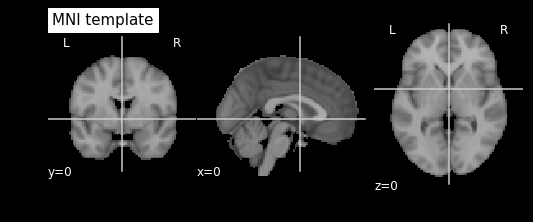

In [3]:
plotting.plot_anat(anatomical_image, cut_coords=[0, 0, 0], title='MNI template')

## Gettin help

As with all python functions you can use `help(fucntion_name)` or the `?` in notebooks to get more information regarding that funcition.

In [4]:
help(plotting.plot_anat)

Help on function plot_anat in module nilearn.plotting.img_plotting:

plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x1058aff60>, vmin=None, vmax=None, **kwargs)
    Plot cuts of an anatomical image (by default 3 cuts:
    Frontal, Axial, and Lateral)
    
    Parameters
    ----------
    anat_img : Niimg-like object
        See http://nilearn.github.io/manipulating_images/input_output.html
        The anatomical image to be used as a background. If None is
        given, nilearn tries to find a T1 template.
    cut_coords : None, a tuple of floats, or an integer
        The MNI coordinates of the point where the cut is performed
        If display_mode is 'ortho', this should be a 3-tuple: (x, y, z)
        For display_mode == 'x', 'y', or 'z', then these are the
      

In [5]:
plotting.plot_anat?

## Plotting Statistical images `plot_stat_map`

In this section, we show how to use `plotting.plot_stat_map` to visualize statistical results overlayed onto aligned to specific anatomical images or default MNI template. Most suitable images are Z-map, T-map, ICA statistical maps.

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press on its own subject specific anatomical image.

First, we fetch and load the functional images available in Nilearn datasets module
No need to import again since we imported datasets module on top

In [6]:
# Fetch t-contrasts maps from Nilearn datasets module
localizer_dataset = datasets.fetch_localizer_button_task(
    n_subjects=2,
    get_anats=True)

# Anatomical image filename
localizer_anat_filename = localizer_dataset.anats[1]

# T-contrast map filename
localizer_tmap_filename = localizer_dataset.tmaps[1]

The variables `localizer_anat_filename` and `localizer_tmap_filename` only hold filenames 
for MRI data stored on the hard disk.

In [7]:
print(localizer_anat_filename)
print(localizer_tmap_filename)

/Users/franzliem/nilearn_data/brainomics_localizer/brainomics_data/S02/normalized_T1_anat_defaced.nii.gz
/Users/franzliem/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz



We want to **visualize statistical t-map** on its **anatomical image**.

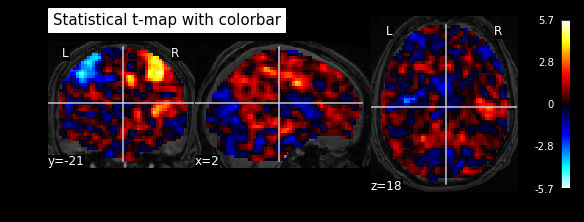

In [8]:
# Visualize statistical t-map on its anatomical image
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       title="Statistical t-map with colorbar")

- We can add a **threshold**

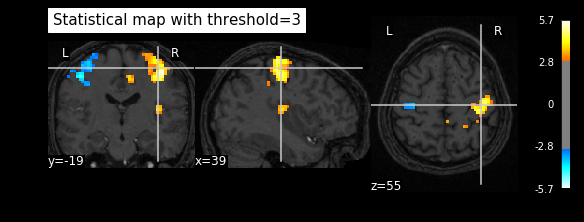

In [9]:
# Visualizing t-map with `threshold=3` based on its statistical intensities
plotting.plot_stat_map(localizer_tmap_filename, bg_img=localizer_anat_filename,
                       threshold=3,
                       title="Statistical map with threshold=3")

## Plotting statistical maps with glass brain image `plot_glass_brain`

In this setting, we show the t-contrast maps obtained from task fMRI datasets during a left vs right button press overlayed on cool glass brain schematics image. `plotting.plot_glass_brain` will be used here.

**Note:** Here, background image is not needed since background image is always brain schematic image and statistical map should be normalized to MNI brain space to be aligned properly.

- Visualizing **t-map** with **glass brain as background image**.
- With **colorbar**
- With **negative and thresholded values.**

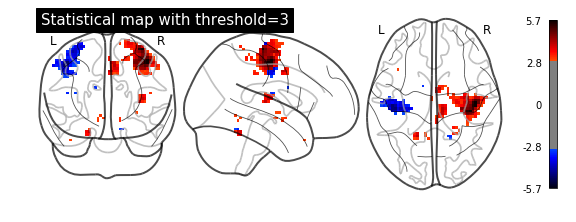

In [10]:
# Visualizing with plot_abs=False & threshold=3
plotting.plot_glass_brain(localizer_tmap_filename, 
                          threshold=3,
                          plot_abs=False, 
                          colorbar=True,
                          title='Statistical map with threshold=3')


- This also can be done for each **hemisphere** separately.

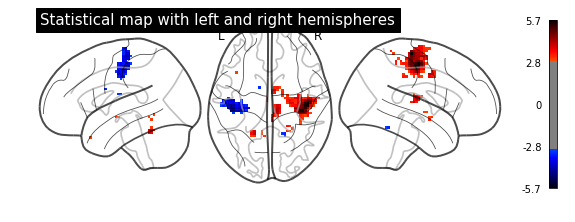

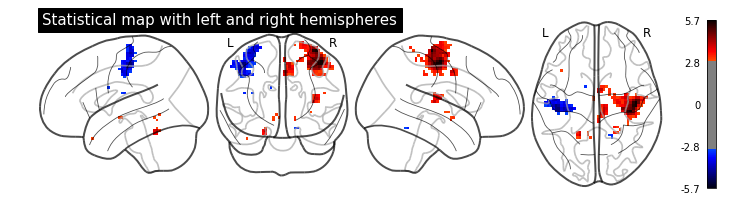

In [11]:
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, plot_abs=False, display_mode="lzr",
                         colorbar=True, title="Statistical map with left and right hemispheres")
plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, plot_abs=False,  display_mode="lyrz",
                         colorbar=True, title="Statistical map with left and right hemispheres")

# Going further

## Saving plots

To save plots as files we need to first write them into a variable `fig` in our case:

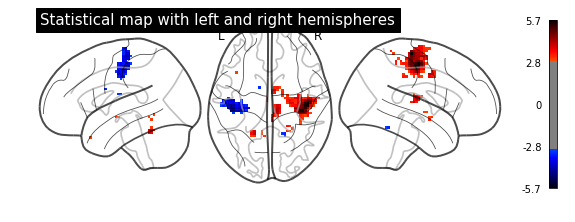

In [12]:
fig = plotting.plot_glass_brain(localizer_tmap_filename, threshold=3, plot_abs=False, display_mode="lzr",
                         colorbar=True, title="Statistical map with left and right hemispheres")

Then we can use the `.savefig` function to write it to the hard disk:

In [13]:
fig.savefig("stat_map_glass_brain.pdf")

## Plotting your own files

To plot files that are located on your HD, all you need to change is the filename you pass to the `nilearn` functions.

For instance instance, instead of:

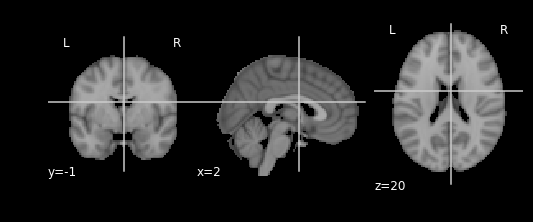

In [14]:
anatomical_image = datasets.load_mni152_template()
# To plot anatomical image
plotting.plot_anat(anatomical_image)

You can change `anatomical_image` to:
```
anatomical_image = "/Users/yourname/project/sub-01/T1w.nii.gz"
```
And **rerun** the cell.


# Other cool plotting funcions

- **`plotting.plot_roi`**

- **`plotting.plot_connectome`**


See **`2_1_visualization_of_brain_images`** tutorial.

## Plotting multiple ICA maps in one figure

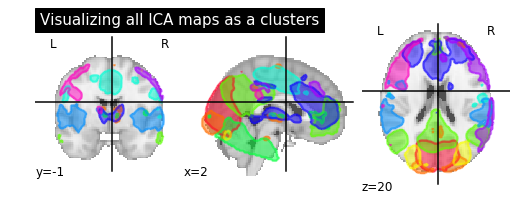

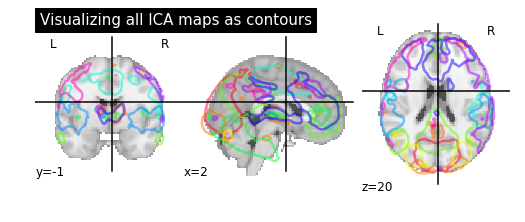

In [15]:
# Fetching ICA maps from atlas smith 2009
ica_maps = datasets.fetch_atlas_smith_2009().rsn10
# Visualizing ICA maps with view_type='filled_contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='filled_contours',
                         title='Visualizing all ICA maps as a clusters')
# Visualizing ICA maps with view_type='contours'
plotting.plot_prob_atlas(maps_img=ica_maps, view_type='contours',
                         title='Visualizing all ICA maps as contours')

## Connectomes

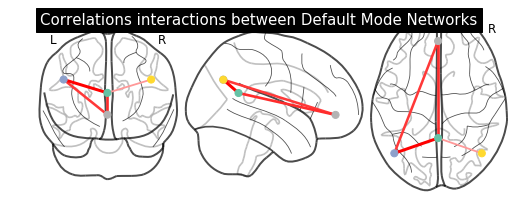

In [16]:
# Default Mode Network coordinates
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (0, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex'
]
# import numpy module to fetch correlation values from csv file
import numpy as np
correlations = np.genfromtxt('corr.csv', delimiter=',', dtype=None)
# Visualization
display = plotting.plot_connectome(adjacency_matrix=correlations, node_coords=dmn_coords,
                                   edge_threshold='40%',
                                   title='Correlations interactions between Default Mode Networks')